In [39]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import linear_model, decomposition, datasets
from sklearn import svm
from sklearn import metrics

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
11890530,Spencer,FLINDERS LANE,SPENCER STREET,KING STREET,3,1882N,20/09/2012 04:25:01 PM,20/09/2012 04:30:55 PM,354,1/2P MTR M-SAT 7:30-19:30,0,669,6930
7088306,Queensberry,LEVESON STREET,QUEENSBERRY STREET,VICTORIA STREET,2,6394E,28/04/2012 03:55:34 PM,28/04/2012 04:18:40 PM,1386,1P SAT 12:30-23:30,0,881,3768
8913085,Courtney,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,5,4797W,23/06/2012 07:42:29 AM,23/06/2012 07:49:47 AM,438,2P TKT A SAT 7:30-12:30,0,627,3253
11878660,The Mac,FRANKLIN STREET,SWANSTON STREET,VICTORIA STREET,1,C6468,20/09/2012 12:43:14 PM,20/09/2012 01:36:41 PM,3207,2P MTR M-SAT 7:30-20:30,0,681,5288
10205381,Titles,Lt LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,3,3446N,01/08/2012 07:30:08 AM,01/08/2012 09:13:41 AM,6213,1P MTR M-SAT 7:30-19:30,1,926,5078


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
4204216,Regency,EXHIBITION STREET,LA TROBE STREET,Lt LONSDALE STREET,1,C600,31/01/2012 07:30:08 AM,31/01/2012 08:30:00 PM,46792,2P MTR M-SAT 7:30-20:30,1,647,266
4860122,Princes Theatre,EXHIBITION STREET,Lt BOURKE STREET,BOURKE STREET,1,C442,19/02/2012 12:17:05 PM,19/02/2012 12:41:45 PM,1480,1P SUN 7:30-18:30,0,647,280
3031942,Titles,QUEEN STREET,LA TROBE STREET,Lt LONSDALE STREET,2,1286E,23/12/2011 09:39:23 AM,23/12/2011 12:27:22 PM,10079,2P DIS M-SUN 0:00-23:59,1,1171,753
10821903,The Mac,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,3,3770N,19/08/2012 01:39:03 PM,19/08/2012 01:40:29 PM,86,1P SUN 7:30-18:30,0,856,1517
5605589,Princes Theatre,LONSDALE STREET,EXHIBITION STREET,SPRING STREET,1,C2764,12/03/2012 05:26:43 PM,12/03/2012 05:28:02 PM,79,2P MTR M-SAT 7:30-20:30,0,894,1917


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1082
Princes Theatre     742
Victoria Market     729
Southbank           639
Regency             628
The Mac             582
Hyatt               578
Titles              534
Rialto              432
Hardware            425
County              424
Courtney            412
City Square         412
Chinatown           379
Magistrates         365
Banks               364
Spencer             362
RACV                320
Jolimont            265
Supreme             208
Docklands            60
Tavistock            57
West Melbourne        1
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
11890530,SPENCER,FLINDERS LANE,SPENCER STREET,KING STREET,3,1882N,20/09/2012 04:25:01 PM,20/09/2012 04:30:55 PM,354,1/2P MTR M-SAT 7:30-19:30,0,669,6930
7088306,QUEENSBERRY,LEVESON STREET,QUEENSBERRY STREET,VICTORIA STREET,2,6394E,28/04/2012 03:55:34 PM,28/04/2012 04:18:40 PM,1386,1P SAT 12:30-23:30,0,881,3768
8913085,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,5,4797W,23/06/2012 07:42:29 AM,23/06/2012 07:49:47 AM,438,2P TKT A SAT 7:30-12:30,0,627,3253
11878660,THE MAC,FRANKLIN STREET,SWANSTON STREET,VICTORIA STREET,1,C6468,20/09/2012 12:43:14 PM,20/09/2012 01:36:41 PM,3207,2P MTR M-SAT 7:30-20:30,0,681,5288
10205381,TITLES,LT LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,3,3446N,01/08/2012 07:30:08 AM,01/08/2012 09:13:41 AM,6213,1P MTR M-SAT 7:30-19:30,1,926,5078


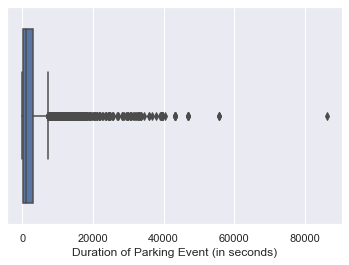

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             1000
QUEEN STREET                 773
EXHIBITION STREET            580
FRANKLIN STREET              561
LA TROBE STREET              532
COLLINS STREET               516
ELIZABETH STREET             500
RUSSELL STREET               446
BOURKE STREET                383
LT LONSDALE STREET           323
LT COLLINS STREET            289
KING STREET                  276
FLINDERS LANE                275
SPRING STREET                262
ERROL STREET                 242
WILLIAM STREET               215
COVENTRY STREET              172
VICTORIA STREET              167
LT BOURKE STREET             166
A'BECKETT STREET             146
FLINDERS STREET              141
SPENCER STREET               131
QUEENSBERRY STREET           127
CAPEL STREET                 122
DORCAS STREET                 95
THERRY STREET                 94
ALBERT STREET                 91
LEVESON STREET                86
O'CONNELL STREET              79
COBDEN STREET                 73
KAVANAGH S

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            912
QUEEN STREET           785
QUEENSBERRY STREET     660
WILLIAM STREET         644
RUSSELL STREET         519
EXHIBITION STREET      478
LT LONSDALE STREET     470
SWANSTON STREET        467
SPENCER STREET         460
LT COLLINS STREET      370
LONSDALE STREET        355
VICTORIA STREET        330
BOURKE STREET          294
COLLINS STREET         274
ELIZABETH STREET       245
LT BOURKE STREET       236
FLINDERS LANE          186
WILLAM STREET          173
THERRY STREET          162
LA TROBE STREET        147
A'BECKETT STREET       147
WELLS STREET           131
FRANKLIN STREET        112
STURT STREET            97
KINGS WAY               91
FLINDERS STREET         91
O'CONNELL STREET        86
SOUTHBANK BOULEVARD     86
DODDS STREET            84
ERROL STREET            83
HOWARD STREET           65
BALSTON STREET          64
PELHAM STREET           63
PEEL STREET             59
ALBERT STREET           56
COBDEN STREET           51
VICTORIA PARADE         47
N

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         867
VICTORIA STREET        833
ELIZABETH STREET       806
QUEEN STREET           805
EXHIBITION STREET      504
LONSDALE STREET        491
SPRING STREET          481
KING STREET            460
RUSSELL STREET         391
COLLINS STREET         370
FLINDERS LANE          365
LT BOURKE STREET       355
LT COLLINS STREET      294
LA TROBE STREET        258
SWANSTON STREET        245
BOURKE STREET          236
FLINDERS STREET        186
LT LONSDALE STREET     173
FRANKLIN STREET        162
DODDS STREET           150
ST KILDA ROAD          131
QUEENSBERRY STREET     100
POWER STREET            96
LEVESON STREET          83
LANSDOWNE STREET        81
HAWKE STREET            77
WALSH STREET            70
WELLS STREET            68
A'BECKETT STREET        65
THERRY STREET           64
CAPEL STREET            59
ELM STREET              48
MILES STREET            42
GISBORNE STREET         39
HOWARD STREET           35
DUDLEY STREET           35
KAVANAGH STREET         31
C

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
11890530,SPENCER,FLINDERS LANE,SPENCER STREET,KING STREET,3,1882N,2012-09-20 16:25:01,2012-09-20 16:30:55,354,1/2P MTR M-SAT 7:30-19:30,0,669,6930
7088306,QUEENSBERRY,LEVESON STREET,QUEENSBERRY STREET,VICTORIA STREET,2,6394E,2012-04-28 15:55:34,2012-04-28 16:18:40,1386,1P SAT 12:30-23:30,0,881,3768
8913085,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,5,4797W,2012-06-23 07:42:29,2012-06-23 07:49:47,438,2P TKT A SAT 7:30-12:30,0,627,3253
11878660,THE MAC,FRANKLIN STREET,SWANSTON STREET,VICTORIA STREET,1,C6468,2012-09-20 12:43:14,2012-09-20 13:36:41,3207,2P MTR M-SAT 7:30-20:30,0,681,5288
10205381,TITLES,LT LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,3,3446N,2012-01-08 07:30:08,2012-01-08 09:13:41,6213,1P MTR M-SAT 7:30-19:30,1,926,5078


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
4204216,REGENCY,EXHIBITION STREET,LA TROBE STREET,LT LONSDALE STREET,1,C600,2012-01-31 07:30:08,2012-01-31 20:30:00,46792,2P MTR M-SAT 7:30-20:30,1,647,266
4860122,PRINCES THEATRE,EXHIBITION STREET,LT BOURKE STREET,BOURKE STREET,1,C442,2012-02-19 12:17:05,2012-02-19 12:41:45,1480,1P SUN 7:30-18:30,0,647,280
3031942,TITLES,QUEEN STREET,LA TROBE STREET,LT LONSDALE STREET,2,1286E,2011-12-23 09:39:23,2011-12-23 12:27:22,10079,2P DIS M-SUN 0:00-23:59,1,1171,753
10821903,THE MAC,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,3,3770N,2012-08-19 13:39:03,2012-08-19 13:40:29,86,1P SUN 7:30-18:30,0,856,1517
5605589,PRINCES THEATRE,LONSDALE STREET,EXHIBITION STREET,SPRING STREET,1,C2764,2012-12-03 17:26:43,2012-12-03 17:28:02,79,2P MTR M-SAT 7:30-20:30,0,894,1917


### SVM Classification Model on Predicitive Analytics question 1

In [19]:
#Target field identification
target = parkingdata['In Violation?']
target.head(10)

11890530    0
7088306     0
8913085     0
11878660    0
10205381    1
7875908     0
8070550     0
10573583    0
11742407    0
7344831     0
Name: In Violation?, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('In Violation?', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
11890530,0,0,0,0,0,3,354,669,6930,16,16
7088306,1,1,1,1,1,2,1386,881,3768,15,16
8913085,2,2,2,2,2,5,438,627,3253,7,7
11878660,3,3,3,1,3,1,3207,681,5288,12,13
10205381,4,4,4,3,4,3,6213,926,5078,7,9
7875908,5,5,5,4,5,5,2633,839,815,10,11
8070550,6,6,6,5,3,2,195,647,140,10,10
10573583,7,7,7,6,6,5,3466,1285,6028,17,18
11742407,8,8,8,7,7,3,68,728,4692,13,13
7344831,3,9,9,8,4,3,838,924,1515,11,11


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
             'max_iter' : [100, 1000, 2500, 5000]}

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 1, 
                                    random_state = 1)
        

clf_GS = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = cv_method, verbose=True, scoring = 'accuracy', return_train_score = True, n_jobs=-1)

In [23]:
#Fit the model with the dataset
best_clf = clf_GS.fit(features, target)
#LogisticRegression().get_params().keys()

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed: 34.9min finished
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data

In [24]:
clf_GS.best_params_

{'C': 0.012742749857031334, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 1000}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 0.001
Best C: 0.012742749857031334
Best max iteration: 1000
Best kernel: rbf


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.1408
1,0.000100,1.000,rbf,1000,0.1947
2,0.000100,1.000,rbf,2500,0.8656
3,0.000100,1.000,rbf,5000,0.8656
4,0.000100,1.000,poly,100,0.4671
5,0.000100,1.000,poly,1000,0.4990
6,0.000100,1.000,poly,2500,0.3155
7,0.000100,1.000,poly,5000,0.5900
8,0.000100,1.000,sigmoid,100,0.8656
9,0.000100,1.000,sigmoid,1000,0.8656


In [27]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [28]:
# Hill climbing w/ SVM
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = SVM.fit(x_train, y_train)
    cur_Score = SVM.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 1 selected features: 0.457


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 2 selected features: 0.6325


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 3 selected features: 0.8035


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 4 selected features: 0.809


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 5 selected features: 0.881


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 6 selected features: 0.8825


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Score with 7 selected features: 0.8825

Indexs of the desired features
[2, 4, 9, 1, 6, 0, 5]


In [29]:
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Sign,Arrival Hour,Street Name,Duration of Parking Event (in seconds),Area Name,Side Of Street
11890530,0,0,16,0,354,0,3
7088306,1,1,15,1,1386,1,2
8913085,2,2,7,2,438,2,5
11878660,3,3,12,3,3207,3,1
10205381,4,4,7,4,6213,4,3
7875908,5,5,10,5,2633,5,5
8070550,6,3,10,6,195,6,2
10573583,7,6,17,7,3466,7,5
11742407,8,7,13,8,68,8,3
7344831,9,4,11,9,838,3,3


In [30]:
bestModel = clf_GS.fit(features_hc, target)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed: 28.8min finished
C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data

In [31]:
clf_GS.best_params_

{'C': 1.623776739188721, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': 1000}

In [32]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 0.001
Best C: 1.623776739188721
Best max iteration: 1000
Best kernel: rbf


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.4321
1,0.000100,1.000,rbf,1000,0.7264
2,0.000100,1.000,rbf,2500,0.8656
3,0.000100,1.000,rbf,5000,0.8656
4,0.000100,1.000,poly,100,0.2737
5,0.000100,1.000,poly,1000,0.4249
6,0.000100,1.000,poly,2500,0.4304
7,0.000100,1.000,poly,5000,0.4258
8,0.000100,1.000,sigmoid,100,0.8656
9,0.000100,1.000,sigmoid,1000,0.8656


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)



 Accuracy score: 0.89620

 Misclassification Rate: 0.10380

 True Positive Rate: 0.41892

 True Negative Rate: 0.96954

 Precision : 0.67883

 Prevalence : 0.13320

 F score : 0.51811

 False Positive Rate: 0.03046


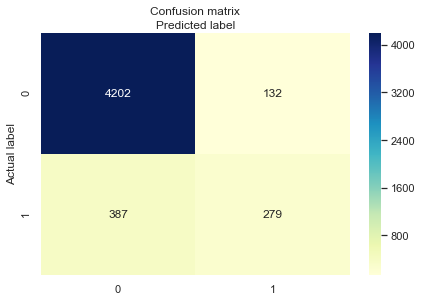

In [52]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
SVM.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = SVM.predict(x_test)
cm = metrics.confusion_matrix(y_test,predicted)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

#Printing the numerical result of the confusion matrix
print("\n Accuracy score: {:.5f}".format(SVM.score(x_test, y_test)))
misclassification_error = (FP + FN) / float(TP + TN + FP + FN)
print("\n Misclassification Rate: {:.5f}".format(misclassification_error))
sensitivity = TP / float(FN + TP)
print("\n True Positive Rate: {:.5f}".format(sensitivity))
specificity = TN / (TN + FP)
print("\n True Negative Rate: {:.5f}".format(specificity))
precision = TP / float(TP + FP)
print("\n Precision : {:.5f}".format(precision))
prevalence =  float(FN + TP)/float(TP + TN + FP + FN)
print("\n Prevalence : {:.5f}".format(prevalence))
fscore = (2 * precision * sensitivity) / (precision + sensitivity)
print("\n F score : {:.5f}".format(fscore))
print("\n False Positive Rate: {:.5f}".format(1-specificity))

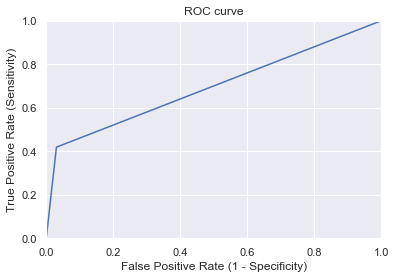

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,predicted)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [38]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    SVM.fit(x_train, y_train)
    kFoldTotal += SVM.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, SVM.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 0] score: 0.90300


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 1] score: 0.90350


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 2] score: 0.89800


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 3] score: 0.90550


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[fold 4] score: 0.90200

KNN mean score [5 folds] = 0.9024
